In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from dataset import *
from models import *
from utils import *
import pandas as pd

plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 2.0

In [ ]:
results_df1 = pd.DataFrame()
for ratio in [0.1, 0.3, 0.5, 0.7, 0.9]:
    for seed in range(0, 80):
        df = pd.read_csv(f"../results/synthetic_results_A_{ratio}_{seed}.csv")
        results_df1 = pd.concat([results_df1, df], ignore_index=True)
results_df1 = results_df1.drop(columns=['setting'])
tarnet1 = results_df1[results_df1['model'] == 'TARNet']
x_learner1 = results_df1[results_df1['model'] == 'X_learner']
h_learner1 = results_df1[(results_df1['model'] == 'H_learner (X)') & (results_df1['alpha'].isna())]

results_df2 = pd.DataFrame()
for ratio in [0.2,0.3,0.4,0.5]:
    for seed in range(0, 80):
        df = pd.read_csv(f"../results/synthetic_results_B_{ratio}_{seed}.csv")
        results_df2 = pd.concat([results_df2, df], ignore_index=True)
results_df2 = results_df2.drop(columns=['setting'])
tarnet2 = results_df2[results_df2['model'] == 'TARNet']
x_learner2 = results_df2[results_df2['model'] == 'X_learner']
h_learner2 = results_df2[(results_df2['model'] == 'H_learner (X)') & (results_df2['alpha'].isna())]

results_df3 = pd.DataFrame()
for ratio in [0.0,0.2,0.4,0.6,0.8]:
    for seed in range(0, 80):
        df = pd.read_csv(f"../results/synthetic_results_C_{ratio}_{seed}.csv")
        results_df3 = pd.concat([results_df3, df], ignore_index=True)
results_df3 = results_df3.drop(columns=['setting'])
tarnet3 = results_df3[results_df3['model'] == 'TARNet']
x_learner3 = results_df3[results_df3['model'] == 'X_learner']
h_learner3 = results_df3[(results_df3['model'] == 'H_learner (X)') & (results_df3['alpha'].isna())]

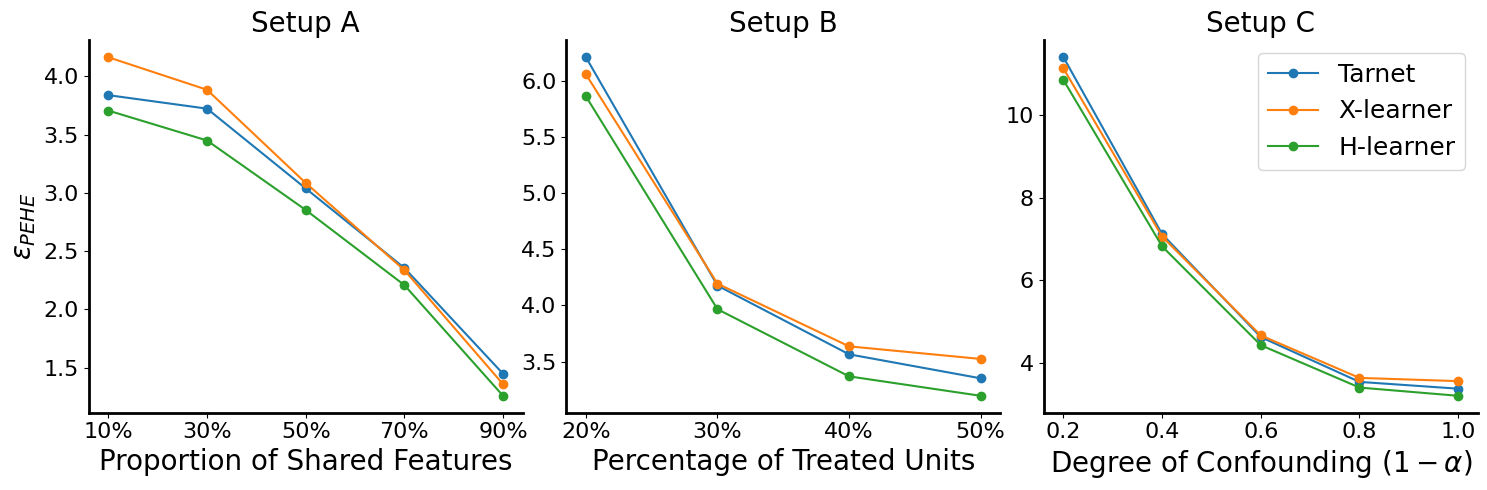

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

ratios1 = [0.1, 0.3, 0.5, 0.7, 0.9]
axs[0].plot(ratios1, tarnet1.groupby(['model', 'ratio']).mean()["pehe_test"].values, 'o-', label='Tarnet')
axs[0].plot(ratios1, x_learner1.groupby(['model', 'ratio']).mean()["pehe_test"].values, 'o-', label='X-learner')
axs[0].plot(ratios1, h_learner1.groupby(['model', 'ratio']).mean()["pehe_test"].values, 'o-', label='H-learner')
axs[0].set_xlabel('Proportion of Shared Features', fontsize=20)
axs[0].set_ylabel(r'$\epsilon_{PEHE}$', fontsize=20)
axs[0].set_xticks(ratios1)
axs[0].set_xticklabels(["10%", "30%", "50%", "70%", "90%"])
axs[0].tick_params(axis='x', labelsize=16)
axs[0].tick_params(axis='y', labelsize=16)
axs[0].set_title("Setup A", fontsize=20)

ratios2 = [0.2, 0.3, 0.4, 0.5]
axs[1].plot(ratios2, tarnet2.groupby(['model', 'ratio']).mean()["pehe_test"].values, 'o-', label='Tarnet')
axs[1].plot(ratios2, x_learner2.groupby(['model', 'ratio']).mean()["pehe_test"].values, 'o-', label='X-learner')
axs[1].plot(ratios2, h_learner2.groupby(['model', 'ratio']).mean()["pehe_test"].values, 'o-', label='H-learner')
axs[1].set_xlabel('Percentage of Treated Units', fontsize=20)
axs[1].set_xticks(ratios2)
axs[1].set_xticklabels(["20%", "30%", "40%", "50%"])
axs[1].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='y', labelsize=16)
axs[1].set_title("Setup B", fontsize=20)

ratios3 = [0, 0.2, 0.4, 0.6, 0.8]
axs[2].plot(ratios3, tarnet3.groupby(['model', 'ratio']).mean()["pehe_test"].values, 'o-', label='Tarnet')
axs[2].plot(ratios3, x_learner3.groupby(['model', 'ratio']).mean()["pehe_test"].values, 'o-', label='X-learner')
axs[2].plot(ratios3, h_learner3.groupby(['model', 'ratio']).mean()["pehe_test"].values, 'o-', label='H-learner')
axs[2].set_xlabel(r'Degree of Confounding ($1-\alpha$)', fontsize=20)
axs[2].set_xticks(ratios3)
axs[2].set_xticklabels(["1.0", "0.8", "0.6", "0.4", "0.2"])
axs[2].invert_xaxis()
axs[2].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='y', labelsize=16)
axs[2].legend(fontsize=18)
axs[2].set_title("Setup C", fontsize=20)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.show()


In [ ]:
results_df_low1 = pd.DataFrame()
ratio = 0.1
for seed in range(0, 80):
    df = pd.read_csv(f"../results/synthetic_results_A_{ratio}_{seed}.csv")
    results_df_low1 = pd.concat([results_df_low1, df], ignore_index=True)
results_df_low1 = results_df_low1[results_df_low1['alpha'].notna()]
results_df_low1 = results_df_low1.drop(columns=['setting'])

results_df_medium1 = pd.DataFrame()
ratio = 0.5
for seed in range(0, 80):
    df = pd.read_csv(f"../results/synthetic_results_A_{ratio}_{seed}.csv")
    results_df_medium1 = pd.concat([results_df_medium1, df], ignore_index=True)
results_df_medium1 = results_df_medium1[results_df_medium1['alpha'].notna()]
results_df_medium1 = results_df_medium1.drop(columns=['setting'])

results_df_high1 = pd.DataFrame()
ratio = 0.9
for seed in range(0, 80):
    df = pd.read_csv(f"../results/synthetic_results_A_{ratio}_{seed}.csv")
    results_df_high1 = pd.concat([results_df_high1, df], ignore_index=True)
results_df_high1 = results_df_high1[results_df_high1['alpha'].notna()]
results_df_high1 = results_df_high1.drop(columns=['setting'])

h_learner_low_performance1 = results_df_low1.groupby(['model', 'alpha']).mean().reset_index()
h_learner_medium_performance1 = results_df_medium1.groupby(['model', 'alpha']).mean().reset_index()
h_learner_high_performance1 = results_df_high1.groupby(['model', 'alpha']).mean().reset_index()


results_df_low2 = pd.DataFrame()
ratio = 0.2
for seed in range(0, 80):
    df = pd.read_csv(f"../results/synthetic_results_B_{ratio}_{seed}.csv")
    results_df_low2 = pd.concat([results_df_low2, df], ignore_index=True)
results_df_low2 = results_df_low2[results_df_low2['alpha'].notna()]
results_df_low2 = results_df_low2.drop(columns=['setting'])

results_df_medium2 = pd.DataFrame()
ratio = 0.4
for seed in range(0, 80):
    df = pd.read_csv(f"../results/synthetic_results_B_{ratio}_{seed}.csv")
    results_df_medium2 = pd.concat([results_df_medium2, df], ignore_index=True)
results_df_medium2 = results_df_medium2[results_df_medium2['alpha'].notna()]
results_df_medium2 = results_df_medium2.drop(columns=['setting'])

results_df_high2 = pd.DataFrame()
ratio = 0.5
for seed in range(0, 80):
    df = pd.read_csv(f"../results/synthetic_results_B_{ratio}_{seed}.csv")
    results_df_high2 = pd.concat([results_df_high2, df], ignore_index=True)
results_df_high2 = results_df_high2[results_df_high2['alpha'].notna()]
results_df_high2 = results_df_high2.drop(columns=['setting'])

h_learner_low_performance2 = results_df_low2.groupby(['model', 'alpha']).mean().reset_index()
h_learner_medium_performance2 = results_df_medium2.groupby(['model', 'alpha']).mean().reset_index()
h_learner_high_performance2 = results_df_high2.groupby(['model', 'alpha']).mean().reset_index()

results_df_low3 = pd.DataFrame()
ratio = 0.2
for seed in range(0, 80):
    df = pd.read_csv(f"../results/synthetic_results_C_{ratio}_{seed}.csv")
    results_df_low3 = pd.concat([results_df_low3, df], ignore_index=True)
results_df_low3 = results_df_low3[results_df_low3['alpha'].notna()]
results_df_low3 = results_df_low3.drop(columns=['setting'])

results_df_medium3 = pd.DataFrame()
ratio = 0.4
for seed in range(0, 80):
    df = pd.read_csv(f"../results/synthetic_results_C_{ratio}_{seed}.csv")
    results_df_medium3 = pd.concat([results_df_medium3, df], ignore_index=True)
results_df_medium3 = results_df_medium3[results_df_medium3['alpha'].notna()]
results_df_medium3 = results_df_medium3.drop(columns=['setting'])

results_df_high3 = pd.DataFrame()
ratio = 0.8
for seed in range(0, 80):
    df = pd.read_csv(f"../results/synthetic_results_C_{ratio}_{seed}.csv")
    results_df_high3 = pd.concat([results_df_high3, df], ignore_index=True)
results_df_high3 = results_df_high3[results_df_high3['alpha'].notna()]
results_df_high3 = results_df_high3.drop(columns=['setting'])

h_learner_low_performance3 = results_df_low3.groupby(['model', 'alpha']).mean().reset_index()
h_learner_medium_performance3 = results_df_medium3.groupby(['model', 'alpha']).mean().reset_index()
h_learner_high_performance3 = results_df_high3.groupby(['model', 'alpha']).mean().reset_index()

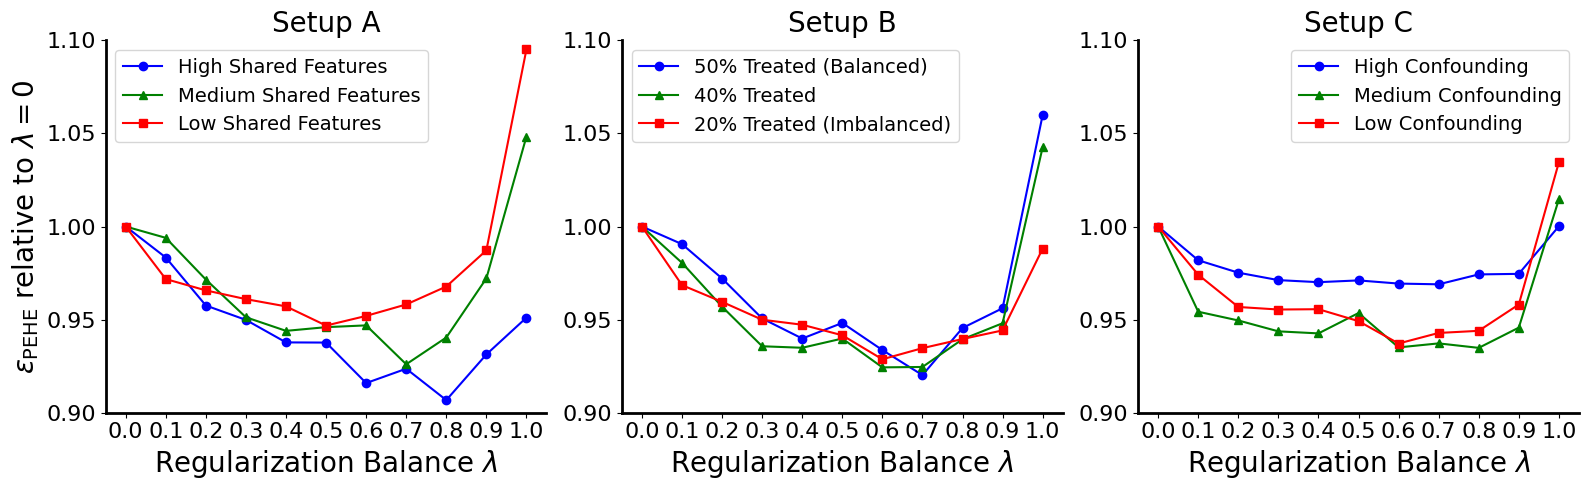

In [37]:
baseline_low1 = h_learner_low_performance1[h_learner_low_performance1['alpha'] == 0]['pehe_test'].values[0]
h_learner_low_performance1['relative_pehe'] = h_learner_low_performance1['pehe_test'] / baseline_low1

baseline_medium1 = h_learner_medium_performance1[h_learner_medium_performance1['alpha'] == 0]['pehe_test'].values[0]
h_learner_medium_performance1['relative_pehe'] = h_learner_medium_performance1['pehe_test'] / baseline_medium1

baseline_high1 = h_learner_high_performance1[h_learner_high_performance1['alpha'] == 0]['pehe_test'].values[0]
h_learner_high_performance1['relative_pehe'] = h_learner_high_performance1['pehe_test'] / baseline_high1

df_low1 = h_learner_low_performance1.sort_values('alpha')
df_medium1 = h_learner_medium_performance1.sort_values('alpha')
df_high1 = h_learner_high_performance1.sort_values('alpha')

baseline_low2 = h_learner_low_performance2[h_learner_low_performance2['alpha'] == 0]['pehe_test'].values[0]
h_learner_low_performance2['relative_pehe'] = h_learner_low_performance2['pehe_test'] / baseline_low2

baseline_medium2 = h_learner_medium_performance2[h_learner_medium_performance2['alpha'] == 0]['pehe_test'].values[0]
h_learner_medium_performance2['relative_pehe'] = h_learner_medium_performance2['pehe_test'] / baseline_medium2

baseline_high2 = h_learner_high_performance2[h_learner_high_performance2['alpha'] == 0]['pehe_test'].values[0]
h_learner_high_performance2['relative_pehe'] = h_learner_high_performance2['pehe_test'] / baseline_high2

df_low2 = h_learner_low_performance2.sort_values('alpha')
df_medium2 = h_learner_medium_performance2.sort_values('alpha')
df_high2 = h_learner_high_performance2.sort_values('alpha')

baseline_low3 = h_learner_low_performance3[h_learner_low_performance3['alpha'] == 0]['pehe_test'].values[0]
h_learner_low_performance3['relative_pehe'] = h_learner_low_performance3['pehe_test'] / baseline_low3

baseline_medium3 = h_learner_medium_performance3[h_learner_medium_performance3['alpha'] == 0]['pehe_test'].values[0]
h_learner_medium_performance3['relative_pehe'] = h_learner_medium_performance3['pehe_test'] / baseline_medium3

baseline_high3 = h_learner_high_performance3[h_learner_high_performance3['alpha'] == 0]['pehe_test'].values[0]
h_learner_high_performance3['relative_pehe'] = h_learner_high_performance3['pehe_test'] / baseline_high3

df_low3 = h_learner_low_performance3.sort_values('alpha')
df_medium3 = h_learner_medium_performance3.sort_values('alpha')
df_high3 = h_learner_high_performance3.sort_values('alpha')

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
titles = ['Setup A', 'Setup B', 'Setup C']
dfs = [
    (df_low1, df_medium1, df_high1),
    (df_low2, df_medium2, df_high2),
    (df_low3, df_medium3, df_high3)
]

legend_labels = [
    ['Low Shared Features', 'Medium Shared Features', 'High Shared Features'],
    ['20% Treated (Imbalanced)', '40% Treated', '50% Treated (Balanced)'],
    ['Low Confounding', 'Medium Confounding', 'High Confounding']
]

for i, ax in enumerate(axs):
    df_low, df_medium, df_high = dfs[i]
    labels = legend_labels[i]

    ax.plot(df_high['alpha'], df_high['relative_pehe'], marker='o', color='blue', label=labels[2])
    ax.plot(df_medium['alpha'], df_medium['relative_pehe'], marker='^', color='green', label=labels[1])
    ax.plot(df_low['alpha'], df_low['relative_pehe'], marker='s', color='red', label=labels[0])

    ax.set_title(titles[i], fontsize=20)
    ax.set_xlabel(r'Regularization Balance $\lambda$', fontsize=20)
    if i == 0:
        ax.set_ylabel(r'$\epsilon_{\mathrm{PEHE}}$ relative to $\lambda = 0$', fontsize=20)
    ax.set_xticks([round(x * 0.1, 1) for x in range(11)])
    ax.set_ylim(0.9, 1.10)
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.legend(fontsize=14)

plt.tight_layout()
plt.show()